<a href="https://colab.research.google.com/github/cmAIdx/ml_learning_notebooks/blob/main/Project3_Ensemble_ModelTuning_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Author: C.Marcus    
####Date: 5/16/24


---



# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

The deliverable is to be a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
job = pd.read_csv("/content/sample_data/BankChurners.csv")

In [3]:
# Checking the number of rows and columns in the data
job.shape

(10127, 21)

The dataset has 10127 rows and 21 columns

## Data Overview

In [4]:
# let's create a copy of the data
df = job.copy()

### Displaying the first few rows of the dataset

In [5]:
# let's view the first 5 rows of the data
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [6]:
# let's view the last 5 rows of the data
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [7]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

*   Six object columns will need to be converted to numeric if of value for modelling
*   CLIENTNUM is an ID column so can be dropped
*   Education_Level and Maritial_Status have less than 10127 values so have missing values that may need to be imputed.




### Checking for duplicate values

In [8]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

 * No duplicates we need to address

### Checking for missing values

In [9]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

As identified above:
*   Education_Level is missing 15% of its' values out of the total observations
*   Marital_Status is mising 7.4% of it's values out of the total observations



In [10]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


# Observations

- The standard deviation for Total_Revolving_Bal is 16349.46, which is significantly higher than the mean of 8855.63, indicating a large spread in the data.
- The minimum value for Total_Trans_Ct is 0, while the maximum value is 339, suggesting that some customers have made a substantial number of transactions in the last 12 months.
- The average value for Avg_Utilization_Ratio is 50.7%, indicating that customers, on average, are using about half of their available credit limit.
- The maximum value for Months_Inactive_12_mon is 6, suggesting that some customers have been inactive for a significant period of time.

In [11]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

CLIENTNUM
768805383   0.000
711784908   0.000
720133908   0.000
803197833   0.000
812222208   0.000
             ... 
796903083   0.000
716014983   0.000
712521783   0.000
780045708   0.000
714337233   0.000
Name: proportion, Length: 10127, dtype: float64
--------------------------------------------------
Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64
--------------------------------------------------
Customer_Age
44   0.049
49   0.049
46   0.048
45   0.048
47   0.047
43   0.047
48   0.047
50   0.045
42   0.042
51   0.039
53   0.038
41   0.037
52   0.037
40   0.036
39   0.033
54   0.030
38   0.030
55   0.028
56   0.026
37   0.026
57   0.022
36   0.022
35   0.018
59   0.016
58   0.016
34   0.014
33   0.013
60   0.013
32   0.010
65   0.010
61   0.009
62   0.009
31   0.009
26   0.008
30   0.007
63   0.006
29   0.006
64   0.004
27   0.003
28   0.003
67   0.000
66   0.000
68   0.000
70   0.000
73   0.000
Name: proportion, dtype: float64
-

In [12]:
# CLIENTNUM is unique ID and might not add value to modeling
df.drop(["CLIENTNUM"], axis=1, inplace=True)

We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

## Object Variable Conversions
Need to convert the categorical/object variables to numeric.

1. **The categorical variables are:**
   * Attrition_Flag
   * Gender
   * Education_Level
   * Marital_Status
   * Income_Category
   * Card_Category

2. **Encode the categorical variables:**
   * For binary categorical variables (Attrition_Flag and Gender), will use label encoding.
   * For multi-category categorical variables (Education_Level, Marital_Status, Income_Category, and Card_Category), will use one-hot encoding.


## Exploratory Data Analysis (EDA)

In [13]:
#Create a dataframe copy for EDA
data = df.copy()

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [16]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [17]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<a id='eda'></a>
### <a id='link'>Summary of EDA</a>

* The dataset has 10127 rows and 21 columns
* 15 variables are numerical, the remaining 6 are object types.
* 2 columns have less than 10127 non-null values i.e. columns have missing values.

**Data Cleaning**
* Drop "CLIENTNUM" as it is unique for each client and might not add value to modeling.
* Missing value imputation will be done after splitting the data.



**Observations from EDA**

**Univariate Analysis**

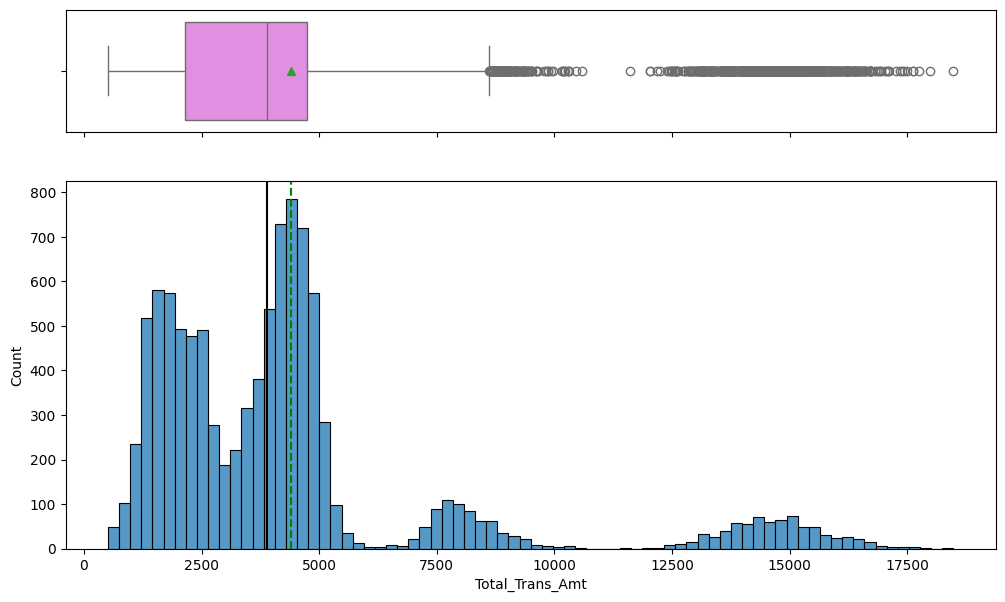

In [19]:
# Univariate analysis, key questions:

# 1. How is the total transaction amount distributed?
histogram_boxplot(data, "Total_Trans_Amt")



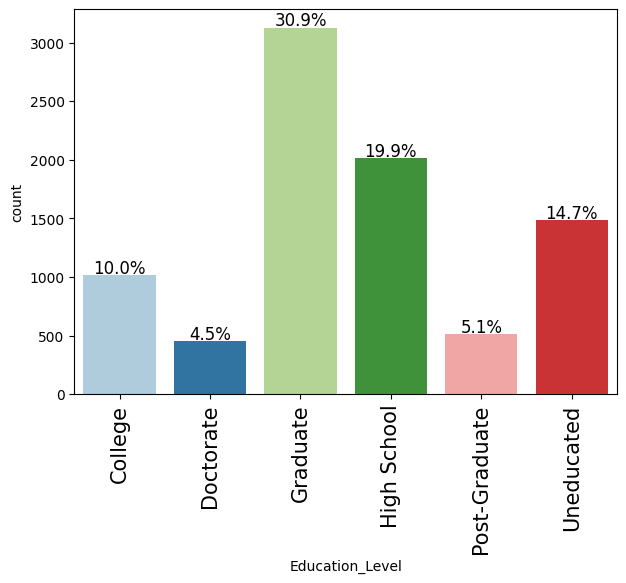

In [20]:

# 2. What is the distribution of the level of education of customers?
labeled_barplot(data, "Education_Level", perc=True)



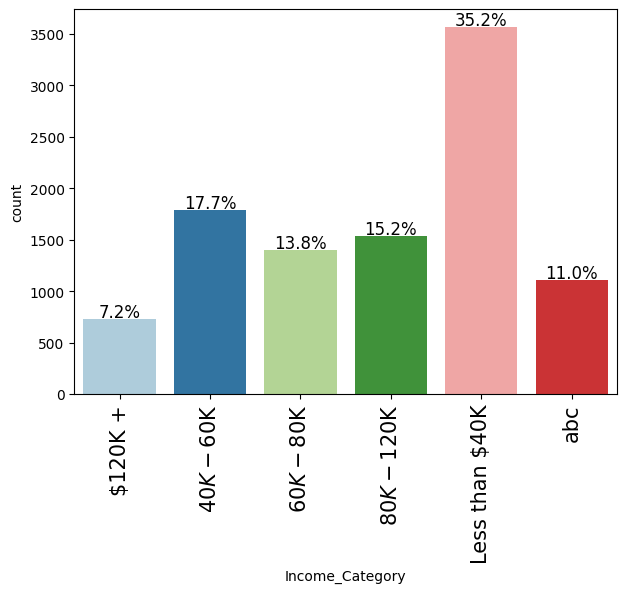

In [21]:
# 3. What is the distribution of the level of income of customers?
labeled_barplot(data, "Income_Category", perc=True)



## Univariate Analysis Observations
* The distribution of Total_Trans_Amt is right-skewed, indicating that most customers have relatively low transaction amounts, while a few have very high transaction amounts.
* The most common level of education among customers is High School, followed by Graduate and College.
* The majority of customers fall into the "Less than 40K" income category, followed by "40k - 60k" and "60k - 80k".
* Customers with a high school education have the highest number of inactive months, followed by those with a graduate degree and those with a college degree.
* The boxplots show that there are outliers in the data, with some customers being inactive for more than 6 months.
* The distribution of inactive months is similar for customers with different income levels.
* There is no clear relationship between the number of inactive months and the level of income of customers.

## Bivariate Analysis

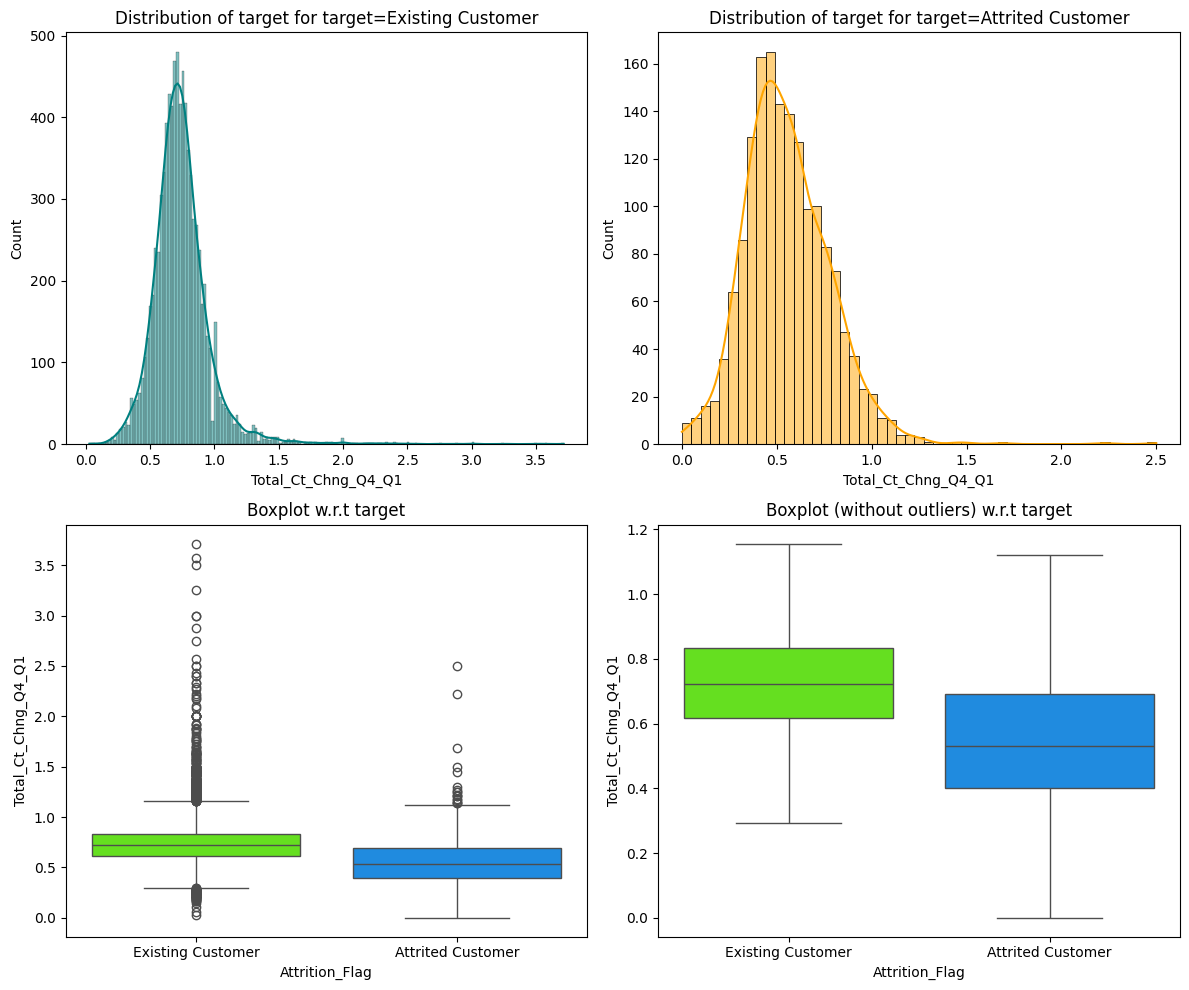

In [22]:

#Bivariate Analysis, key questions:

# 4. How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")



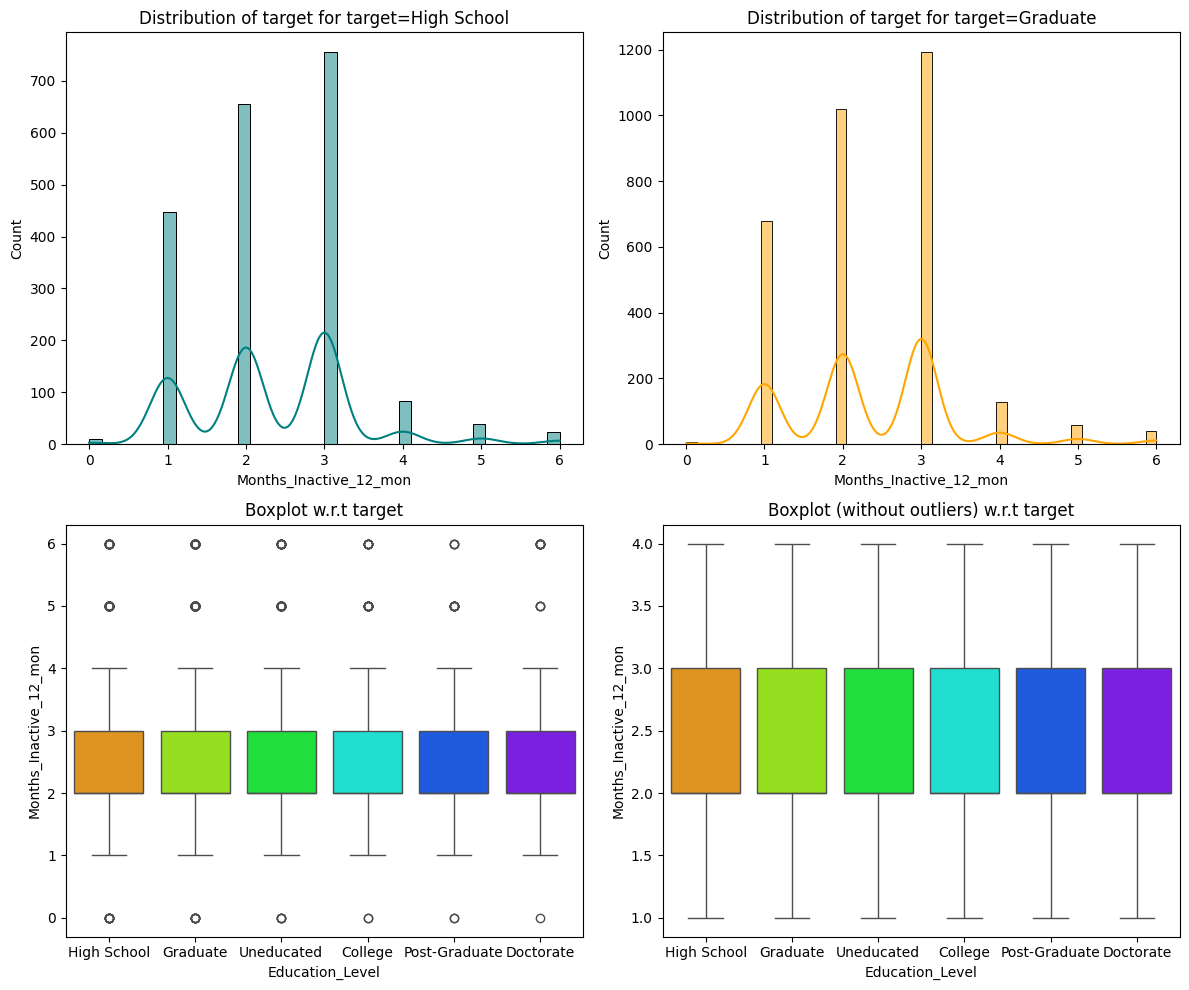

In [23]:
# 5. How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the level of education of customers?
distribution_plot_wrt_target(data, "Months_Inactive_12_mon", "Education_Level")



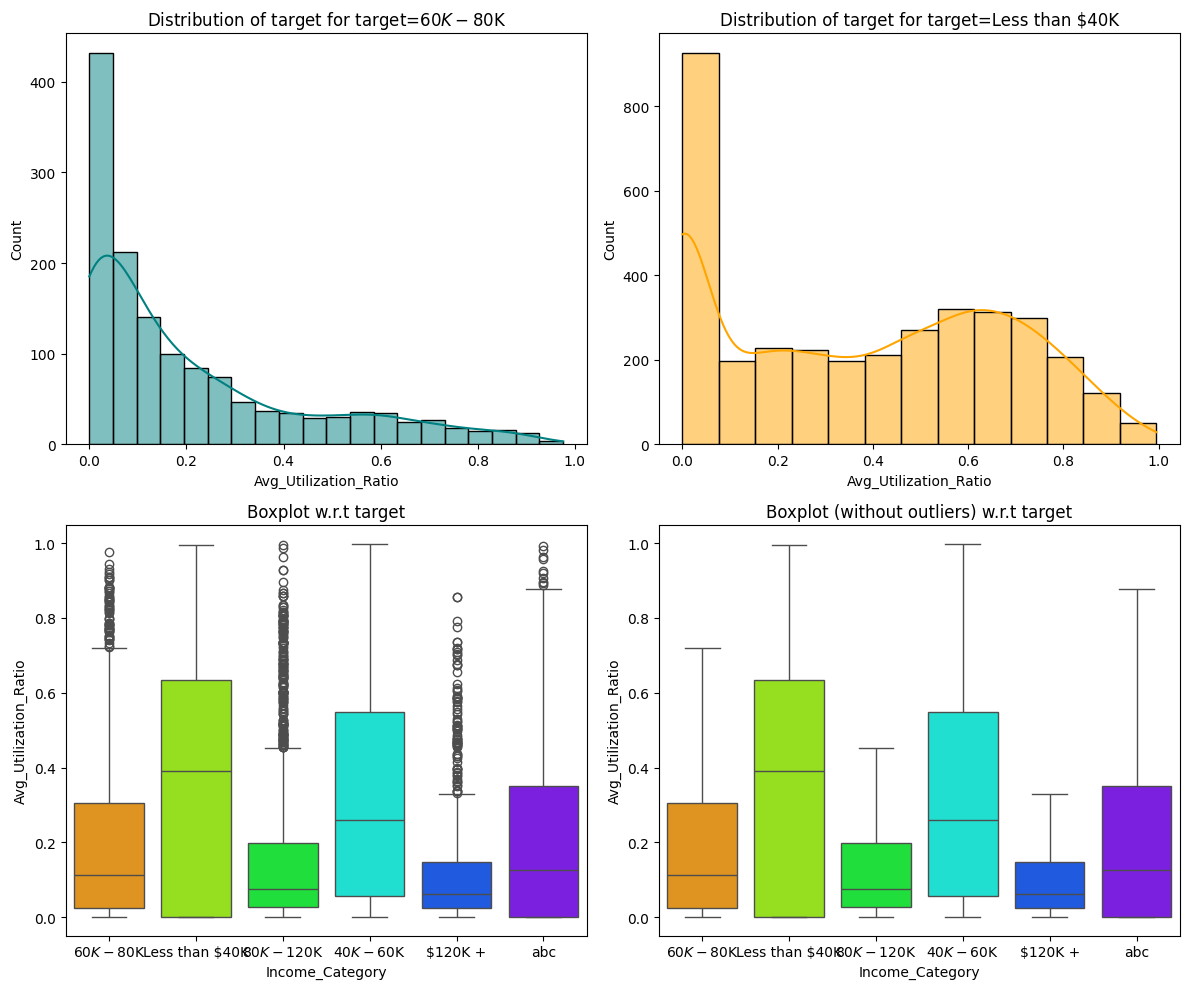

In [24]:

# 6. How does the average utilization ratio vary by the income category of customers?
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Income_Category")



#Bivariate Analysis Observations
- Customers with high school education have the highest number of inactive months, followed by those with a graduate degree and those with a college degree.
- There is no clear relationship between the number of inactive months and the level of income of customers.
- Customers with higher income levels tend to have a higher average utilization ratio.
- Customers with high school education have a higher total transaction amount change between Q4 and Q1 compared to customers with other education levels.
- Customers with a graduate degree have a lower average utilization ratio compared to customers with other education levels.

## Data Pre-processing

In [25]:

# Label encoding for binary categorical variables
data["Attrition_Flag"] = df["Attrition_Flag"].replace({"Existing Customer": 0, "Attrited Customer": 1})
data["Gender"] = df["Gender"].replace({"M": 0, "F": 1})

# One-hot encoding for multi-category categorical variables
education_dummies = pd.get_dummies(data["Education_Level"], prefix="Education_Level")
marital_dummies = pd.get_dummies(data["Marital_Status"], prefix="Marital_Status")
income_dummies = pd.get_dummies(data["Income_Category"], prefix="Income_Category")
card_dummies = pd.get_dummies(data["Card_Category"], prefix="Card_Category")

# Concatenate the encoded columns to the original dataframe and drop the original object columns
data = pd.concat([data, education_dummies, marital_dummies, income_dummies, card_dummies], axis=1)
data.drop(
    [
        "Education_Level",
        "Marital_Status",
        "Income_Category",
        "Card_Category",
    ],
    axis=1,
    inplace=True,
)

data['Customer_Age'] = pd.cut(data['Customer_Age'], bins=5, labels=False)
data['Dependent_count'] = pd.cut(data['Dependent_count'], bins=5, labels=False)
data['Months_on_book'] = pd.cut(data['Months_on_book'], bins=5, labels=False)


In [26]:
# check that these are all now categorical
# list of all categorical variables
cat_col = data.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
--------------------------------------------------
Customer_Age
2   0.429
1   0.322
3   0.144
0   0.091
4   0.015
Name: proportion, dtype: float64
--------------------------------------------------
Gender
1   0.529
0   0.471
Name: proportion, dtype: float64
--------------------------------------------------
Dependent_count
0   0.271
2   0.270
1   0.262
3   0.155
4   0.042
Name: proportion, dtype: float64
--------------------------------------------------
Months_on_book
2   0.469
3   0.231
1   0.173
4   0.081
0   0.046
Name: proportion, dtype: float64
--------------------------------------------------
Total_Relationship_Count
3   0.228
4   0.189
5   0.187
6   0.184
2   0.123
1   0.090
Name: proportion, dtype: float64
--------------------------------------------------
Months_Inactive_12_mon
3   0.380
2   0.324
1   0.220
4   0.043
5   0.018
6   0.012
0   0.003
Name: proportion, dtype: float64
-----------------------------

In [27]:
# Create groups for Customer_Age and Months_on_book, and review again
data['Customer_Age'] = pd.cut(data['Customer_Age'], bins=5, labels=False)
data['Months_on_book'] = pd.cut(data['Months_on_book'], bins=5, labels=False)

# check that these are all now categorical
# list of all categorical variables
cat_col = data.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)


Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
--------------------------------------------------
Customer_Age
2   0.429
1   0.322
3   0.144
0   0.091
4   0.015
Name: proportion, dtype: float64
--------------------------------------------------
Gender
1   0.529
0   0.471
Name: proportion, dtype: float64
--------------------------------------------------
Dependent_count
0   0.271
2   0.270
1   0.262
3   0.155
4   0.042
Name: proportion, dtype: float64
--------------------------------------------------
Months_on_book
2   0.469
3   0.231
1   0.173
4   0.081
0   0.046
Name: proportion, dtype: float64
--------------------------------------------------
Total_Relationship_Count
3   0.228
4   0.189
5   0.187
6   0.184
2   0.123
1   0.090
Name: proportion, dtype: float64
--------------------------------------------------
Months_Inactive_12_mon
3   0.380
2   0.324
1   0.220
4   0.043
5   0.018
6   0.012
0   0.003
Name: proportion, dtype: float64
-----------------------------

* Values have been encoded.
* We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

### Data Preparation for Modeling

In [28]:
data1 = data.copy()

In [29]:
# Separate independent and dependent variables
X = data1.drop("Attrition_Flag", axis=1)
y = data1["Attrition_Flag"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split the train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6480, 34)
y_train shape: (6480,)
X_val shape: (1621, 34)
y_val shape: (1621,)
X_test shape: (2026, 34)
y_test shape: (2026,)


In [30]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6480
Number of rows in validation data = 1621
Number of rows in test data = 2026


### Missing Value Treatment

In [31]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                      0
Gender                            0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Avg_Open_To_Buy                   0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Education_Level_College           0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Divorced           0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$120K +           0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K

### Reverse Mapping for Encoded Variables

In [32]:
# Reverse mappings for the encoded variables

# Reverse mapping for education level
education_mapping = {
    "Education_Level_High School": "High School",
    "Education_Level_Graduate": "Graduate",
    "Education_Level_College": "College",
    "Education_Level_Post-Graduate": "Post-Graduate",
    "Education_Level_Doctorate": "Doctorate",
}

# Reverse mapping for marital status
marital_mapping = {
    "Marital_Status_Married": "Married",
    "Marital_Status_Single": "Single",
    "Marital_Status_Divorced": "Divorced",
}

# Reverse mapping for income category
income_mapping = {
    "Income_Category_Less than 40K": "Less than 40K",
    "Income_Category_40K - 60K": "40K - 60K",
    "Income_Category_60K - 80K": "60K - 80K",
    "Income_Category_80K - 120K": "80K - 120K",
    "Income_Category_120K+": "120K+",
}

# Reverse mapping for card category
card_mapping = {
    "Card_Category_Blue": "Blue",
    "Card_Category_Silver": "Silver",
    "Card_Category_Gold": "Gold",
    "Card_Category_Platinum": "Platinum",
}


In [33]:
# check all variables
X_train.describe()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,6480.000,6480.000,6480.000,6480.000,6480.000,6480.000,6480.000,6480.000,6480.000,6480.000,6480.000,6480.000,6480.000,6480.000,6480.000
mean,1.675,0.527,1.430,2.131,3.804,2.355,2.456,8703.394,1165.485,7537.909,0.760,4385.783,64.693,0.712,0.272
std,0.882,0.499,1.155,0.952,1.556,1.022,1.099,9146.195,813.575,9139.775,0.213,3395.336,23.567,0.238,0.273
min,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,1.000,0.000,0.000,2.000,3.000,2.000,2.000,2571.000,456.750,1364.000,0.632,2144.000,45.000,0.582,0.026
50%,2.000,1.000,1.000,2.000,4.000,2.000,2.000,4577.500,1279.000,3523.000,0.737,3878.000,67.000,0.703,0.174
75%,2.000,1.000,2.000,3.000,5.000,3.000,3.000,11236.750,1784.250,9986.250,0.858,4734.000,81.000,0.818,0.493
max,4.000,1.000,4.000,4.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,2.594,18484.000,139.000,3.714,0.999


In [34]:



cat_col = X_train.columns

# printing the number of occurrences of each unique value in each categorical column
print("Training Data")
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)


cat_col = X_val.columns



Training Data
Customer_Age
2   0.429
1   0.322
3   0.144
0   0.091
4   0.015
Name: proportion, dtype: float64
--------------------------------------------------
Gender
1   0.529
0   0.471
Name: proportion, dtype: float64
--------------------------------------------------
Dependent_count
0   0.271
2   0.270
1   0.262
3   0.155
4   0.042
Name: proportion, dtype: float64
--------------------------------------------------
Months_on_book
2   0.469
3   0.231
1   0.173
4   0.081
0   0.046
Name: proportion, dtype: float64
--------------------------------------------------
Total_Relationship_Count
3   0.228
4   0.189
5   0.187
6   0.184
2   0.123
1   0.090
Name: proportion, dtype: float64
--------------------------------------------------
Months_Inactive_12_mon
3   0.380
2   0.324
1   0.220
4   0.043
5   0.018
6   0.012
0   0.003
Name: proportion, dtype: float64
--------------------------------------------------
Contacts_Count_12_mon
3   0.334
2   0.319
1   0.148
4   0.137
0   0.039
5   0.017
6

In [35]:
X_val.describe()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1621.000,1621.000,1621.000,1621.000,1621.000,1621.000,1621.000,1621.000,1621.000,1621.000,1621.000,1621.000,1621.000,1621.000,1621.000
mean,1.651,0.532,1.402,2.120,3.850,2.313,2.428,8369.329,1139.985,7229.344,0.766,4471.766,65.766,0.714,0.276
std,0.895,0.499,1.141,0.955,1.537,0.982,1.106,8841.149,823.107,8836.903,0.232,3427.260,23.500,0.244,0.279
min,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1438.300,0.000,24.000,0.101,644.000,14.000,0.059,0.000
25%,1.000,0.000,0.000,2.000,3.000,2.000,2.000,2481.000,0.000,1231.000,0.628,2216.000,46.000,0.586,0.000
50%,2.000,1.000,1.000,2.000,4.000,2.000,2.000,4431.000,1250.000,3387.000,0.739,3970.000,68.000,0.698,0.175
75%,2.000,1.000,2.000,3.000,5.000,3.000,3.000,10699.000,1773.000,9600.000,0.862,4761.000,81.000,0.818,0.517
max,4.000,1.000,4.000,4.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,2.675,17119.000,130.000,3.571,0.987


In [36]:

# check all variables

cat_col = X_val.columns

# printing the number of occurrences of each unique value in each categorical column
print("Validation Data")
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

cat_col = X_test.columns



Validation Data
Customer_Age
2   0.429
1   0.322
3   0.144
0   0.091
4   0.015
Name: proportion, dtype: float64
--------------------------------------------------
Gender
1   0.529
0   0.471
Name: proportion, dtype: float64
--------------------------------------------------
Dependent_count
0   0.271
2   0.270
1   0.262
3   0.155
4   0.042
Name: proportion, dtype: float64
--------------------------------------------------
Months_on_book
2   0.469
3   0.231
1   0.173
4   0.081
0   0.046
Name: proportion, dtype: float64
--------------------------------------------------
Total_Relationship_Count
3   0.228
4   0.189
5   0.187
6   0.184
2   0.123
1   0.090
Name: proportion, dtype: float64
--------------------------------------------------
Months_Inactive_12_mon
3   0.380
2   0.324
1   0.220
4   0.043
5   0.018
6   0.012
0   0.003
Name: proportion, dtype: float64
--------------------------------------------------
Contacts_Count_12_mon
3   0.334
2   0.319
1   0.148
4   0.137
0   0.039
5   0.017

In [37]:

# check all variables

cat_col = X_test.columns

# printing the number of occurrences of each unique value in each categorical column
print("Test Data")
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

Test Data
Customer_Age
2   0.429
1   0.322
3   0.144
0   0.091
4   0.015
Name: proportion, dtype: float64
--------------------------------------------------
Gender
1   0.529
0   0.471
Name: proportion, dtype: float64
--------------------------------------------------
Dependent_count
0   0.271
2   0.270
1   0.262
3   0.155
4   0.042
Name: proportion, dtype: float64
--------------------------------------------------
Months_on_book
2   0.469
3   0.231
1   0.173
4   0.081
0   0.046
Name: proportion, dtype: float64
--------------------------------------------------
Total_Relationship_Count
3   0.228
4   0.189
5   0.187
6   0.184
2   0.123
1   0.090
Name: proportion, dtype: float64
--------------------------------------------------
Months_Inactive_12_mon
3   0.380
2   0.324
1   0.220
4   0.043
5   0.018
6   0.012
0   0.003
Name: proportion, dtype: float64
--------------------------------------------------
Contacts_Count_12_mon
3   0.334
2   0.319
1   0.148
4   0.137
0   0.039
5   0.017
6   0

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.


**From a business perspecitive in this use case, a false negative prediction means that the model predicted that a customer will not attrit, when in fact the will (actual true positive). This has a much greater impact to the bank than predicting that a customer will attrit when in fact they won't (false positive). Given this, we want to maximize Recall in order to minimize false negatives.**


**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [39]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [40]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 0.9812206572769953
Random forest: 1.0
GBM: 0.8985915492957747
Adaboost: 0.8732394366197183
dtree: 1.0

Validation Performance:

Bagging: 0.7957446808510639
Random forest: 0.7361702127659574
GBM: 0.8553191489361702
Adaboost: 0.8595744680851064
dtree: 0.8085106382978723


In [41]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9812, Validation Score: 0.7957, Difference: 0.1855
Random forest: Training Score: 1.0000, Validation Score: 0.7362, Difference: 0.2638
GBM: Training Score: 0.8986, Validation Score: 0.8553, Difference: 0.0433
Adaboost: Training Score: 0.8732, Validation Score: 0.8596, Difference: 0.0137
dtree: Training Score: 1.0000, Validation Score: 0.8085, Difference: 0.1915


With Original Data: Adaboost and GBM both have consistently high validation scores, but Adaboost has a lower delta so we will select Adaboost as the #1 and GBM as #2.

### Model Building with Oversampled data


In [42]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1065
Before Oversampling, counts of label 'No': 5415 

After Oversampling, counts of label 'Yes': 5415
After Oversampling, counts of label 'No': 5415 

After Oversampling, the shape of train_X: (10830, 34)
After Oversampling, the shape of train_y: (10830,) 



In [43]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9977839335180055
Random forest: 1.0
GBM: 0.9776546629732226
Adaboost: 0.9650969529085872
dtree: 1.0

Validation Performance:

Bagging: 0.8638297872340426
Random forest: 0.8638297872340426
GBM: 0.9148936170212766
Adaboost: 0.8808510638297873
dtree: 0.8382978723404255


In [44]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))



Training and Validation Performance Difference:

Bagging: Training Score: 0.9978, Validation Score: 0.8638, Difference: 0.1340
Random forest: Training Score: 1.0000, Validation Score: 0.8638, Difference: 0.1362
GBM: Training Score: 0.9777, Validation Score: 0.9149, Difference: 0.0628
Adaboost: Training Score: 0.9651, Validation Score: 0.8809, Difference: 0.0842
dtree: Training Score: 1.0000, Validation Score: 0.8383, Difference: 0.1617


With Oversampling: GBM now had the best performance, followed by Adaboost.

### Model Building with Undersampled data

In [45]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [46]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1065
Before Under Sampling, counts of label 'No': 5415 

After Under Sampling, counts of label 'Yes': 1065
After Under Sampling, counts of label 'No': 1065 

After Under Sampling, the shape of train_X: (2130, 34)
After Under Sampling, the shape of train_y: (2130,) 



In [47]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9971830985915493
Random forest: 1.0
GBM: 0.9812206572769953
Adaboost: 0.9530516431924883
dtree: 1.0

Validation Performance:

Bagging: 0.9276595744680851
Random forest: 0.9446808510638298
GBM: 0.9574468085106383
Adaboost: 0.9446808510638298
dtree: 0.8893617021276595


In [48]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))



Training and Validation Performance Difference:

Bagging: Training Score: 0.9972, Validation Score: 0.9277, Difference: 0.0695
Random forest: Training Score: 1.0000, Validation Score: 0.9447, Difference: 0.0553
GBM: Training Score: 0.9812, Validation Score: 0.9574, Difference: 0.0238
Adaboost: Training Score: 0.9531, Validation Score: 0.9447, Difference: 0.0084
dtree: Training Score: 1.0000, Validation Score: 0.8894, Difference: 0.1106


With Undersampling: Adaboost has the best performance followed by GBM.

In summary:
 AdaBoost was #1 for both Original Data and Undersampling.
 GBM was #1 with Oversampling

While results are very good for both of these, we may still improve these three models with hyperparameter tuning.



### HyperparameterTuning

### Tuning AdaBoostClassifier model with Undersampled Data

In [49]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'n_estimators': 10, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9464788732394366:
CPU times: user 969 ms, sys: 107 ms, total: 1.08 s
Wall time: 31.8 s


In [54]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [55]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.895,0.926,0.872,0.898


In [56]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.877,0.932,0.545,0.688


### Tuning  Gradient Boosting model with Undersampled Data





In [57]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 150, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9530516431924883:
CPU times: user 2.16 s, sys: 127 ms, total: 2.29 s
Wall time: 1min 36s


In [58]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [59]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.921,0.962,0.890,0.924


In [60]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.894,0.970,0.580,0.726


###Tuning Gradient Boosting model with Oversampled data

In [61]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9556786703601109:
CPU times: user 5.1 s, sys: 450 ms, total: 5.55 s
Wall time: 4min 28s


In [62]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.7)

In [63]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.980,0.980,0.980,0.980


In [64]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.936,0.821,0.757,0.788


## Model Comparison and Final Model Selection

In [65]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.921,0.980,0.895
Recall,0.962,0.980,0.926
Precision,0.890,0.980,0.872
F1,0.924,0.980,0.898


In [69]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.894,0.936,0.877
Recall,0.970,0.821,0.932
Precision,0.580,0.757,0.545
F1,0.726,0.788,0.688


Given we want to maximize Recall to minimize false negatives, Gradient Boost with Undersampling has generalised performance, so let's consider it as the best model.

In [70]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.888,0.963,0.594,0.735


* The Gradient Boost model trained on undersampled data has given ~96% recall on the test set
* This performance is in line with what we achieved with this model on the train = ~96%, and validation = ~97%, sets
* So, this is a generalized model

### Test set final performance

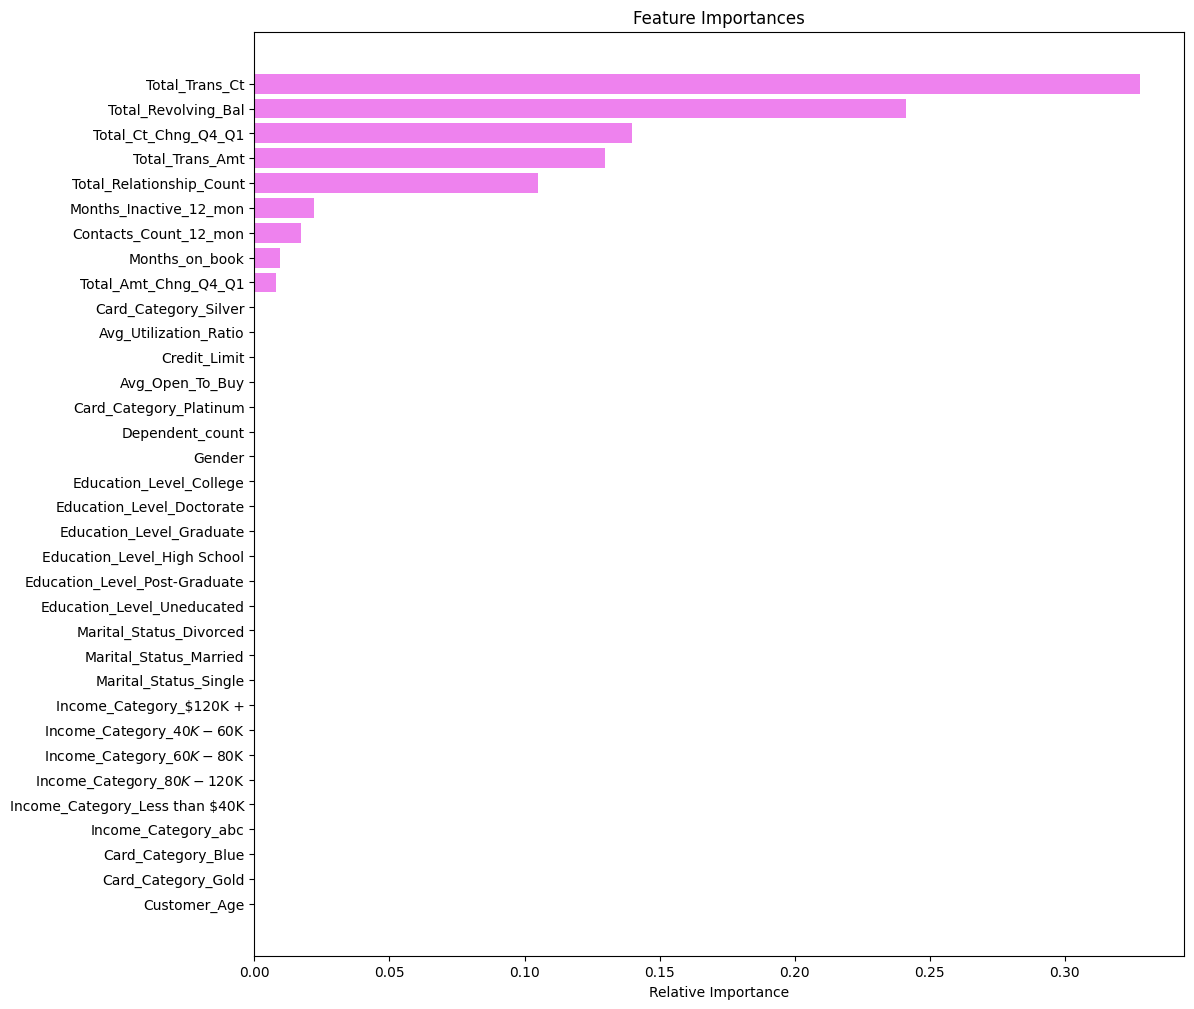

In [71]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

###Key Features Impacting Attrition

The Variables/features that impact attritions, categorized in order of importance are:

Most Significant Features impacting customer attrition:
1. Total_Trans_Ct: Total Transaction Count (Last 12 months)
2. Total_Revolving_Bal: Total Revolving Balance on the Credit Card

Major Features having affect:
3. Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
4. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
5. Total_Relationship_Count: Total no. of products held by the customer

Minor Features having affect:
6. Months_Inactive_12_mon: No. of months inactive in the last 12 months
7. Contacts_Count_12_mon: No. of Contacts in the last 12 months
8. Months_on_book: Period of relationship with the bank (in months)
9. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)


Feature Summary:
- Total Transaction Count (Last 12 months) and Total Revolving Balance on the Credit Card are the most significant features impacting customer attrition.
- Change in Transaction Amount (Q4 over Q1) and Total Transaction Amount (Last 12 months) are major features affecting customer attrition.
- No. of months inactive in the last 12 months, No. of Contacts in the last 12 months, Period of relationship with the bank (in months), and Change in Transaction Count (Q4 over Q1) are minor features affecting customer attrition.
- The model can be used to identify customers at risk of attrition and take proactive measures to retain them.
- Further analysis and model refinement can be done to improve the model's performance.


###Steps Thera Bank can take to prevent attrition:
1. The Bank can develop detailed analytics and new/additional models that closely track customers with high transaction counts - especially when coupeled with a high total revolving balance. By being proactive in tracking these customers, the bank may be able to identify additional features that indicate a customer will attrit and they may be able to proactively address the issue prior to this occurring.
2. As a second tier - the bank may wany to offer customers with high total transaction amounts and high quarterly changes in transactions additional benefits that may proactively keep them from attitting. These are most likely high value customers (as opposed to #1 above which may have a lot of low value transactions).



***